<a href="https://colab.research.google.com/github/Praveen3ravi/Machine_Learning/blob/main/DECISION_TREE_PRUNING_TECHNIQUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DECISION TREE PRUNING:**
*  Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood.

##**TYPES OF DECISION TREE PRUNING:**

##  **PRE-PRUNING** : 
*  This technique is used before construction of decision tree.
*  Pre-Pruning can be done using Hyperparameter tuning.
*  Overcome the overfitting issue.
*  In this blog i will use GridSearchCV for Hyperparameter tuning.

##  **POST-PRUNING** :
*  This technique is used after construction of decision tree.
*  This technique is used when decision tree will have very large depth and will show overfitting of model.
*  It is also known as backward pruning.
*  This technique is used when we have infinitely grown decision tree.
*  Here we will control the branches of decision tree that is max_depth and min_samples_split using cost_complexity_pruning


#**POST PRUNING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)
accuracy_score(y_train,y_train_predicted)
accuracy_score(y_test,y_test_predicted)

0.8811188811188811

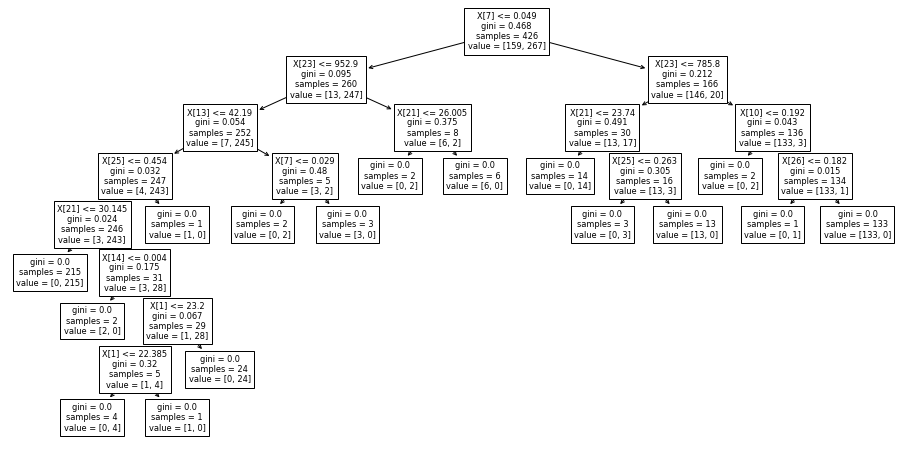

In [3]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

*  ccp_alphas gives minimum leaf value of decision tree and each ccp_aphas will create different - different classifier and choose best out of it.ccp_alphas will be added as a parameter in DecisionTreeClassifier().

In [4]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
***********************************************************
Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


In [5]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.3272984419327777


##**VISUALIZATION OF TRAINING AND TESTING ACCURACY.**

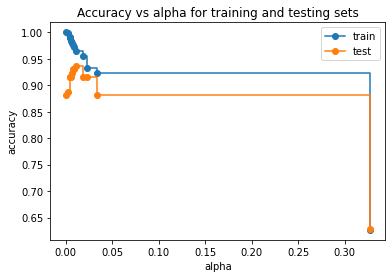

In [6]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

*  If we folow bias and variance tradeoff we will choose that point which will have low bias(low training erro) and low variance(low test error).Here we get that point at a value of alpha=0.02.

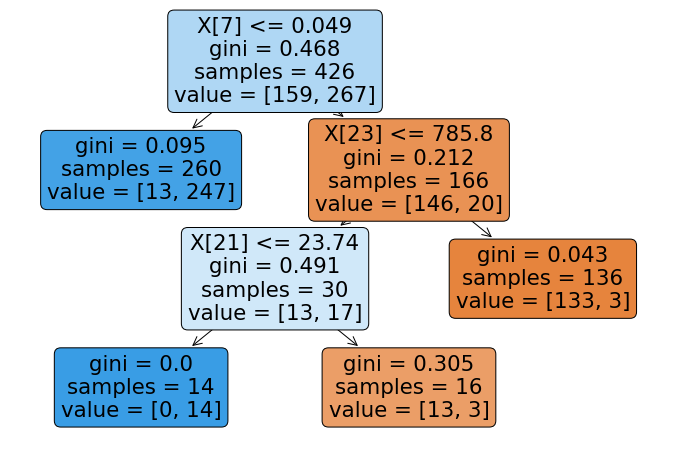

In [7]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [8]:
print('After the Post pruning our accuracy score has been improved to:',accuracy_score(y_test,clf.predict(X_test)))

After the Post pruning our accuracy score has been improved to: 0.916083916083916


#**PRE PRUNING**

##**WHY HYPER-PARAMETER TUNING?**

Let’s take an example of Decision tree. When we build a DT model we don’t have any idea about which criterion (“gini” or “entropy”) ,what min_depth , what min_samples_split etc will give better model so to break this kind of ambiguity we use hyperparameter tuning in which we take a range of value for each parameters and whichever parameteric value will be best we will feed that particular value into DecisionTreeClassifier() .

In [9]:
from sklearn.model_selection import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.02, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

*  estimator-> the classification model you have used,cv=5 -> we have divided our dataset into five chunks,n_jobs=-1 ->we have taken default iteration.

*  Now we extract best parameter out of it and then that parameter would be feed into DecisionTreeClassifier() to get best accurate model.

In [10]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


##**Pre-Pruning Operation :**

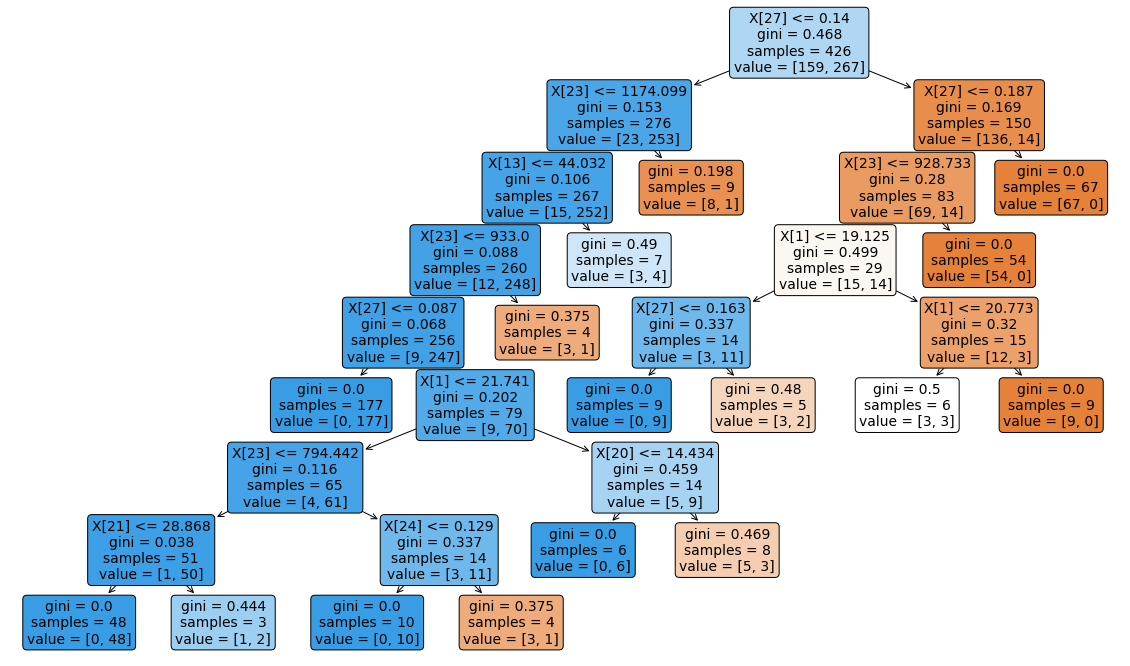

In [11]:
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [12]:
y_predicted=clf.predict(X_test)
print('The accuracy score of test dataset after pruning : ',accuracy_score(y_test,y_predicted))

The accuracy score of test dataset after pruning :  0.9440559440559441
